In [1]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#helper to choose the value of max_leaf_nodes to maximize the accuracy of the trained algorithm.
# to be used with DecisionTreeRegressor.
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
 

In [4]:
X=df[feature_names]
y=df['quality']
#y = df.quality

train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=1)


In [5]:
#specification of the model
model=DecisionTreeRegressor(random_state=3)
#fit model
model.fit(train_X,train_y)

model_validation=model.predict(test_X)

val_mae = mean_absolute_error(model_validation,test_y)
print("Validation MAE: %f"%(val_mae))

tot = len(test_y)
count = 0
list_test_y = test_y.to_list()
 
for i in range(0,tot):
    if(model_validation[i] == list_test_y[i]):
        count+=1
print("Correct %d   over %d"%(count,tot))

Validation MAE: 0.462500
Correct 247   over 400


Text(0, 0.5, 'mean absolute error')

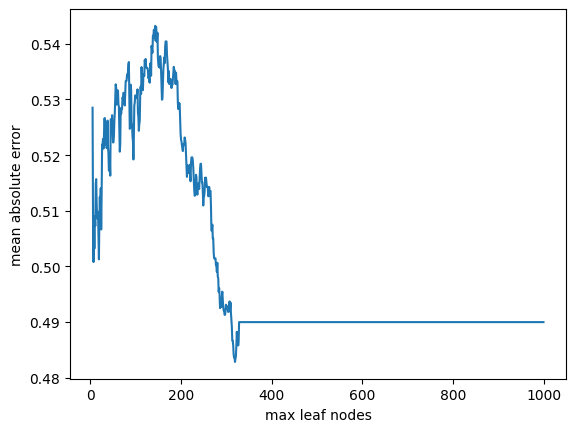

In [6]:
#test to find the best value for number of nodes.
acc = []
upto_max_nodes = 1000
for max_leaf_nodes in range(5,upto_max_nodes):
    my_mae  = get_mae(max_leaf_nodes,train_X,test_X,train_y,test_y)
    #print("Max leafs: %d   MAE: %f"%(max_leaf_nodes,my_mae))
    acc.append(my_mae)
    
plt.plot(range(5,upto_max_nodes),acc)
plt.xlabel("max leaf nodes")
plt.ylabel("mean absolute error")

In [9]:
#define the model with 400 max leaf nodes

#specification of the model
model=DecisionTreeRegressor(max_leaf_nodes=500,random_state=3)
#fit model
model.fit(train_X,train_y)

model_validation=model.predict(test_X)

tot = len(test_y)
count = 0
list_test_y = test_y.to_list()
 
for i in range(0,tot):
    if(model_validation[i] == list_test_y[i]):
        count+=1
print("Correct %d   over %d"%(count,tot))

Correct 237   over 400
